<a href="https://colab.research.google.com/github/italolima04/monitoria-probabilidade-estatistica/blob/master/Pesquisa-PID/Implementa%C3%A7%C3%A3o-Algoritmos/Testes_Pesquisa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando Bibliotecas, Módulos e Dados

In [ ]:
pip install Unidecode

     |████████████████████████████████| 245kB 2.6MB/s 


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import spacy  
import nltk
nltk.download('stopwords')
import re  
from collections import defaultdict 
from unidecode import unidecode
import logging 
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Criando Data Frame a partir dos dados.
data = pd.read_csv('dados-pesquisa.csv')
data = data[['created_at', 'text', 'lang']]

# Visualizando e Explorando os dados

In [ ]:
#Visualizando as 5 primeiras linhas.
data.head()

,created_at,text,lang
0,Mon May 18 17:53:01 +0000 2020,"Tudo mudou na nossa forma de trabalhar, mas na...",pt
1,Mon May 18 17:52:17 +0000 2020,McDonald’s já reabriu lojas ao público https:/...,pt
2,Mon May 18 17:50:40 +0000 2020,"Sindicato, está atento em tudo o que envolve s...",pt
3,Mon May 18 17:49:17 +0000 2020,Nossos problemas da saúde definitivamente acab...,pt
4,Mon May 18 17:49:06 +0000 2020,Fábricas de todo o mundo se viram obrigadas a ...,pt


In [ ]:
#Visualizando as 5 últimas linhas.
data.tail()

,created_at,text,lang
109959,Mon Jul 20 15:04:14 +0000 2020,porto alegre perigando a entrar em lockdown e ...,pt
109960,Mon Jul 20 15:03:35 +0000 2020,"Nunca que a Mídia vai falar isso!\nAMB, CFM e ...",pt
109961,Mon Jul 20 15:03:33 +0000 2020,@joaopiresrj Eu não sou cientista mas esse LOC...,pt
109962,Mon Jul 20 15:01:54 +0000 2020,Q&amp;A - Recessão ou Lockdown. O que é pior? ...,pt
109963,Mon Jul 20 15:01:38 +0000 2020,O prefeito de Los Angeles está preste a decret...,pt


In [ ]:
#Verificando a estrutura inicial dos dados.
data.shape

(109964, 3)

**Podemos observar aproximadamente 110 mil linhas e 6 colunas.**

# Pré-Processando os dados

In [ ]:
#Removendo dados duplicados na coluna de Texto e substituindo dentro do próprio Data Frame.
data.drop_duplicates(['text'], inplace=True)

In [ ]:
#Verificando novamente a estrutura dos dados para observar a quantidade de dados únicos.
data.shape

(103364, 3)

6600 linhas foram removidas.

**Iremos trabalhar com os Dados de Texto, por isso, selecionaremos apenas a coluna associada ao conteúdo dos tweets.**

In [ ]:
#Utilizando notação comum em estudos de Aprendizado de Máquina.
X = data['text']

In [ ]:
#Visualizando as 15 primeiras linhas. 
X[:15]

0     Tudo mudou na nossa forma de trabalhar, mas na...
1     McDonald’s já reabriu lojas ao público https:/...
2     Sindicato, está atento em tudo o que envolve s...
3     Nossos problemas da saúde definitivamente acab...
4     Fábricas de todo o mundo se viram obrigadas a ...
5     @g1 @RedeGlobo @jornalhoje o governo de @jairb...
6     Lei N° 6666, nos #EUA, que pretende traçar e i...
7     https://t.co/mcftUwJr5F o governo precisa ser ...
8     Blockchain: a tecnologia que popularizou o #bi...
9     VOCÊS CONHECEM ALGUM PAÍS ALÉM DO BRASIL QUE T...
10    Itajuípe recebe o Centro Municipal de Isolamen...
11    📣 NOTÍCIA / NEWS / NOUVELLES \n\n🇵🇹 Manual de ...
12    Enquanto o governo Bolsonaro permanecer Irresp...
13    Faça a diferença! Seja um doador sem fronteira...
14    Manaus, maio de 2020. Reportagem sobre o colap...
Name: text, dtype: object

**Devido ao fato de os dados serem proveninentes de uma rede social, se faz necessária uma etapa de pré-processamento nos mesmos.**

In [ ]:
def Preprocessing_data(instance):
      instance = re.sub(r"http\S+", "", instance).lower().replace('.', '').replace(';','').replace('-','').replace(':', '').replace(')', '').replace('(', '')
      stopwords = set(nltk.corpus.stopwords.words('portuguese'))
      words = [i for i in instance.split() if not i in stopwords]
      return (" ".join(words))

**Função que remove links, urls, sinais de pontuação, padroniza os caracteres como minúsculos e remove as stopwords através de um dos módulos da biblioteca NLTK.**

In [ ]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF"  
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [ ]:
#remove_emoji('📣 notícia / news / nouvelles 🇵🇹 manual boas práticas – algarve clean &amp safe 🇬🇧 good practice guide')

In [ ]:
#Aplicando a função na nossa base de dados.
X = [Preprocessing_data(i) for i in X]

In [ ]:
X = [remove_emoji(i) for i in X]

In [ ]:
#Visualizando novamente as 15 primeiras linhas, agora após o pré-processamento.
X[:15]

['tudo mudou forma trabalhar, nada mudou objetivo informar #jornalismo #imprensa…',
 'mcdonald’s reabriu lojas público #comida #covid19 #mcdonalds',
 'sindicato, atento tudo envolve saúde condições trabalho nessa pandemia #covid @spbancarios',
 'problemas saúde definitivamente acabaram #saude #forabolsonaro #covid',
 'fábricas todo mundo viram obrigadas dispensarem funcionários decorrência #covid19 antes m…',
 '@g1 @redeglobo @jornalhoje governo @jairbolsonaro vai socorrer ninguém vai enrolar! pois minto quer r…',
 'lei n° 6666, #eua, pretende traçar investigar percurso pessoas tivestes contatos, usand…',
 'governo precisa ser responsabilizado #covid #covid19',
 'blockchain tecnologia popularizou #bitcoin sendo testada combate #covid19 sistema capaz de…',
 'conhecem algum país além brasil torcida organizada coronavirus???? #covid #covid19',
 'itajuípe recebe centro municipal isolamento covid19 #covid19 #isolamentosocial #covid @rctitajuipe',
 ' notícia / news / nouvelles  manual boas p

In [ ]:
import random
random.shuffle(X)

In [ ]:
X

['abc dois membros comissão técnica testaram positivo covid19',
 'coronavírus avisa digitalize empresa contábil',
 '@meelrocha anos negando cegueira resolvi mandar fazer óculos “lockdown” veio kk sofro',
 '@chico_vigilante pandemia coronavírus separou definitivamente homens monstros "se trocar vida…',
 'tempos coronavírus cidadão audácia abrir embalagem enfiar dedo dentro 🤦\u200d notamos quan…',
 '@opropriolavo cuba adotou protocolo hidroxicloroquina agora, pt puxadinhos vão admitir e…',
 'luz ultravioleta pode eliminar coronavírus, descobrem cientistas',
 '@njlxx @brancowitz 20 hs aspirando coronavirus',
 'chá jambu  pará, ribeirinhos evitam medicamentos covid19 apostam jambu \U0001f9a0',
 'comprei óculos sonhos posso usar pq ainda grau lente odeio coronavirus',
 'comissão @aprovadoscef14 brasília queremos trabalhar #convocacaixa @caixa @jairbolsonaro @redetvt…',
 '@jamiillykelly queria ir pro segundo período, porém coronavírus 🤡🤡🤡🤡🤡🤡🤡🤡🤡',
 'fiocruz fala possibilidade nova onda covid1

In [ ]:
#Criando DataFrame com os dados pré-processados.
data_text = pd.DataFrame(data=X, columns=['text'])

In [ ]:
data_text

,text
0,abc dois membros comissão técnica testaram pos...
1,coronavírus avisa digitalize empresa contábil
2,@meelrocha anos negando cegueira resolvi manda...
3,@chico_vigilante pandemia coronavírus separou ...
4,tempos coronavírus cidadão audácia abrir embal...
...,...
103359,costa rica| município sete casos confirmados c...
103360,dorama acaba mostrar sobre tipo coronavírus me...
103361,#coronavírus total estado sp 190285 casos conf...
103362,coronavírus levantamento aponta 28% pessoas te...


In [ ]:
data_text.text = data_text.text.apply(unidecode)

In [ ]:
file_model = data_text.copy()
file_model = file_model[file_model.text.str.len()>1]

INFO - 18:50:27: NumExpr defaulting to 2 threads.


In [ ]:
file_model

,text
0,abc dois membros comissao tecnica testaram pos...
1,coronavirus avisa digitalize empresa contabil
2,@meelrocha anos negando cegueira resolvi manda...
3,@chico_vigilante pandemia coronavirus separou ...
4,tempos coronavirus cidadao audacia abrir embal...
...,...
103359,costa rica| municipio sete casos confirmados c...
103360,dorama acaba mostrar sobre tipo coronavirus me...
103361,#coronavirus total estado sp 190285 casos conf...
103362,coronavirus levantamento aponta 28% pessoas te...


In [ ]:
#file_export = file_model.copy()
#file_export['old_title'] = file_export.title
#file_export.old_title = file_export.old_title.str.join(' ')
#file_export.title = file_export.title.apply(lambda x: ' '.join(bigram[x]))

In [ ]:
#file_export[['title', 'rate']].to_csv('cleaned_dataset.csv', index=False)

In [ ]:
#v = TfidfVectorizer(decode_error='replace', encoding='utf-8')

In [ ]:
#teste = v.fit_transform(data_text['text'].apply(lambda x: np.str_(x)))
#teste

In [ ]:
#data_text.to_csv('dados_preprocessados.csv', index=False)

In [ ]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#len(data_text['text']) * 0.7

In [ ]:
#train_data = pd.DataFrame()
#test_data = pd.DataFrame()
#train_data['text'] = data_text['text'][:72354]
#test_data['text'] = data_text['text'][72354:]

In [ ]:
#train_data

In [ ]:
#test_data

# Transformando os Dados

In [ ]:
#Importando módulos do Gensim, biblioteca que auxilia na implementação do Modelo Word2VEC.
from gensim.models.phrases import Phrases, Phraser

INFO - 18:50:28: 'pattern' package not found; tag filters are not available for English


In [ ]:
#Quebrando as frases por palavra.
sent = [row.split() for row in data_text['text']]

In [ ]:
#Visualizando a representação criada acima.
sent

[['abc',
  'dois',
  'membros',
  'comissao',
  'tecnica',
  'testaram',
  'positivo',
  'covid19'],
 ['coronavirus', 'avisa', 'digitalize', 'empresa', 'contabil'],
 ['@meelrocha',
  'anos',
  'negando',
  'cegueira',
  'resolvi',
  'mandar',
  'fazer',
  'oculos',
  '"lockdown"',
  'veio',
  'kk',
  'sofro'],
 ['@chico_vigilante',
  'pandemia',
  'coronavirus',
  'separou',
  'definitivamente',
  'homens',
  'monstros',
  '"se',
  'trocar',
  'vida...'],
 ['tempos',
  'coronavirus',
  'cidadao',
  'audacia',
  'abrir',
  'embalagem',
  'enfiar',
  'dedo',
  'dentro',
  'notamos',
  'quan...'],
 ['@opropriolavo',
  'cuba',
  'adotou',
  'protocolo',
  'hidroxicloroquina',
  'agora,',
  'pt',
  'puxadinhos',
  'vao',
  'admitir',
  'e...'],
 ['luz',
  'ultravioleta',
  'pode',
  'eliminar',
  'coronavirus,',
  'descobrem',
  'cientistas'],
 ['@njlxx', '@brancowitz', '20', 'hs', 'aspirando', 'coronavirus'],
 ['cha',
  'jambu',
  'para,',
  'ribeirinhos',
  'evitam',
  'medicamentos',
  '

In [ ]:
phrases = Phrases(sent, min_count=1, progress_per=10000)

INFO - 18:50:28: collecting all words and their counts
INFO - 18:50:28: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 18:50:28: PROGRESS: at sentence #10000, processed 101340 words and 97003 word types
INFO - 18:50:29: PROGRESS: at sentence #20000, processed 201440 words and 172181 word types
INFO - 18:50:29: PROGRESS: at sentence #30000, processed 302181 words and 240802 word types
INFO - 18:50:29: PROGRESS: at sentence #40000, processed 402974 words and 305050 word types
INFO - 18:50:29: PROGRESS: at sentence #50000, processed 504227 words and 365985 word types
INFO - 18:50:29: PROGRESS: at sentence #60000, processed 605083 words and 423957 word types
INFO - 18:50:30: PROGRESS: at sentence #70000, processed 705788 words and 479737 word types
INFO - 18:50:30: PROGRESS: at sentence #80000, processed 806475 words and 533471 word types
INFO - 18:50:30: PROGRESS: at sentence #90000, processed 906803 words and 584742 word types
INFO - 18:50:30: PROGRESS: at sentence #

In [ ]:
#Construindo modelo baseado em Bigram, para a detecção de palavras (únicas) que são formadas por outras duas.
bigram = Phraser(phrases)

INFO - 18:50:30: source_vocab length 652521
INFO - 18:50:34: Phraser added 50000 phrasegrams
INFO - 18:50:36: Phraser built with 59027 phrasegrams


In [ ]:
sentences = bigram[sent]

In [ ]:
len(sentences)

103364

In [ ]:
#Percorrendo os dados e fazendo uma contagem para verificar as palavras mais frequentes da base.
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)

150293

In [ ]:
#Exibindo as 10 palavras mais frequentes da base de dados.
sorted(word_freq, key=word_freq.get, reverse=True)[:10]

['coronavirus',
 'covid19',
 'lockdown',
 'brasil',
 'casos',
 'pra',
 '#coronavirus',
 'mortes',
 'contra',
 'sobre']

# Criando o Modelo Word2VEC.

In [ ]:
#Importando biblioteca e módulo do Gensim, para a implementação do Word2VEC.
import multiprocessing

from gensim.models import Word2Vec

In [ ]:
#Função que conta o número de cores da máquina.
cores = multiprocessing.cpu_count()

In [ ]:
#Instanciando modelo Word2VEC a partir dos mesmos parâmetros estabelecidos pelo artigo.
w2v_model = Word2Vec(min_count=3,
                     window=6,
                     size=300,
                     sample=1e-5, 
                     alpha=0.06, 
                     min_alpha=0.0001, 
                     negative=10,
                     workers=multiprocessing.cpu_count()-1)

In [ ]:
#Construindo vocabulário a partir das sentenças.
w2v_model.build_vocab(sentences, progress_per=10000)

INFO - 18:50:40: collecting all words and their counts
INFO - 18:50:40: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 18:50:40: PROGRESS: at sentence #10000, processed 79870 words, keeping 33829 word types
INFO - 18:50:40: PROGRESS: at sentence #20000, processed 159216 words, keeping 55362 word types
INFO - 18:50:41: PROGRESS: at sentence #30000, processed 238914 words, keeping 72871 word types
INFO - 18:50:41: PROGRESS: at sentence #40000, processed 318630 words, keeping 87820 word types
INFO - 18:50:41: PROGRESS: at sentence #50000, processed 398703 words, keeping 100853 word types
INFO - 18:50:42: PROGRESS: at sentence #60000, processed 478436 words, keeping 112412 word types
INFO - 18:50:42: PROGRESS: at sentence #70000, processed 558160 words, keeping 122631 word types
INFO - 18:50:42: PROGRESS: at sentence #80000, processed 637759 words, keeping 131924 word types
INFO - 18:50:43: PROGRESS: at sentence #90000, processed 716865 words, keeping 140192 word 

# Treinando o Modelo Word2VEC

In [ ]:
#Treiando modelo Word2VEC.
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

INFO - 18:50:52: training model with 1 workers on 42507 vocabulary and 300 features, using sg=0 hs=0 sample=1e-05 negative=10 window=6
INFO - 18:50:53: EPOCH 1 - PROGRESS: at 18.21% examples, 62255 words/s, in_qsize 1, out_qsize 0
INFO - 18:50:54: EPOCH 1 - PROGRESS: at 33.97% examples, 58975 words/s, in_qsize 1, out_qsize 0
INFO - 18:50:55: EPOCH 1 - PROGRESS: at 53.38% examples, 61791 words/s, in_qsize 1, out_qsize 0
INFO - 18:50:56: EPOCH 1 - PROGRESS: at 72.79% examples, 63156 words/s, in_qsize 1, out_qsize 0
INFO - 18:50:57: EPOCH 1 - PROGRESS: at 92.27% examples, 63983 words/s, in_qsize 1, out_qsize 0
INFO - 18:50:58: worker thread finished; awaiting finish of 0 more threads
INFO - 18:50:58: EPOCH - 1 : training on 822962 raw words (353954 effective words) took 5.4s, 65114 effective words/s
INFO - 18:50:59: EPOCH 2 - PROGRESS: at 18.21% examples, 63645 words/s, in_qsize 1, out_qsize 0
INFO - 18:51:00: EPOCH 2 - PROGRESS: at 37.64% examples, 64851 words/s, in_qsize 1, out_qsize 0


(10630255, 24688860)

In [ ]:
#Tornando o modelo mais eficiente em questões de uso de memória.
w2v_model.init_sims(replace=True)

INFO - 18:53:34: precomputing L2-norms of word weight vectors


In [ ]:
file_export = file_model.copy()
file_export['text'] = file_export.text
file_export.text = file_export.text.str.join(' ')
file_export.text = file_export.text.apply(lambda x: ' '.join(bigram[x]))

In [ ]:
file_export

,text
0,a b c d o i s m e m ...
1,c o r o n a v i r u s ...
2,@ m e e l r o c h a a ...
3,@ c h i c o _ v i g i l ...
4,t e m p o s c o r o n ...
...,...
103359,c o s t a r i c a | ...
103360,d o r a m a a c a b a ...
103361,# c o r o n a v i r u s ...
103362,c o r o n a v i r u s ...


In [ ]:
file_export['text'].to_csv('cleaned_dataset.csv', index=False)

# Visualizando Resultados do Modelo Word2VEC

**A partir do Word2VEC podemos verificar a similaridade de outras palavras para determinados termos.**

In [ ]:
w2v_model.wv.most_similar(["vacina"])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('chinesa', 0.8733479976654053),
 ('indo_tomar', 0.8331180810928345),
 ('tomou_vacina', 0.817960798740387),
 ('tomar_vacina', 0.7994276285171509),
 ('vacina,', 0.7959672212600708),
 ('vacina_contra', 0.7924320697784424),
 ('fase_3', 0.7918586730957031),
 ('medica_primeira', 0.7911050319671631),
 ('esperanca', 0.7888954877853394),
 ('vacinas', 0.7874691486358643)]

**Podemos determinar filtros para uma verificação de similaridade.**

In [ ]:
w2v_model.wv.most_similar(["recuperados"])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('soma', 0.9314709901809692),
 ('vale_ribeira', 0.926490306854248),
 ('infec_ativos', 0.9252869486808777),
 ('#coronavirus_#aracaju', 0.9228777885437012),
 ('descartados', 0.9218143224716187),
 ('06_obitos', 0.9216251373291016),
 ('recuperados,', 0.920075535774231),
 ('53', 0.9193903207778931),
 ('135', 0.9181972742080688),
 ('#coronavirus_#sergipe', 0.9162490367889404)]

In [ ]:
w2v_model.wv.most_similar(["mortes"])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('70_mil', 0.8373064398765564),
 ('=_+', 0.8099174499511719),
 ('peru', 0.8052781820297241),
 ('80120', 0.7918678522109985),
 ('casos', 0.7895818948745728),
 ('601', 0.7889728546142578),
 ('68_mil', 0.7863842248916626),
 ('vidas_perdidas', 0.7862203121185303),
 ('amazonas_aproxima', 0.7842822670936584),
 ('ultima_atualizacao', 0.7839978933334351)]

**Podemos compararar a taxa de similaridade para termos específicos.**

In [ ]:
w2v_model.wv.similarity("coronavirus", "mortes")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.22425401

In [ ]:
w2v_model.wv.similarity("covid19", "mortes")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.29352254

In [ ]:
w2v_model.wv.similarity("covid19", "china")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.2134197

In [ ]:
w2v_model.wv.similarity("coronavirus", "casos")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.20209284

In [ ]:
w2v_model.wv.similarity("pandemia", "oms")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.3563343

**Dado uma lista, qual palavra não se encaixa no contexto ?**

In [ ]:
w2v_model.wv.doesnt_match(["mortes", "alegria", "casos"])

/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'alegria'

Positive = Semelhantes
Negative = Opostas

# Aplicando Modelo Não Supervisionado

In [ ]:
#Importando algoritmo KMeans da biblioteca Sklearn.
from sklearn.cluster import KMeans

In [ ]:
#Carregando modelo Word2VEC.
word_vectors = w2v_model.wv
#Criando instância do algoritmo K-Means e passando como entrada os vetores originados pelo Word2VEC.
#n_clusters=2, max_iter=1000, random_state=True, n_init=50
model = KMeans(n_clusters=2, init='k-means++', max_iter=2000, random_state=True, n_init=50).fit(X=word_vectors.vectors)

In [ ]:
negative_cluster_center = model.cluster_centers_[1]
positive_cluster_center = model.cluster_centers_[0]

In [ ]:
#Verificando os vetores que foram entradas para o algoritmo, criados pelo modelo Word2VEC.
word_vectors.vectors

array([[-0.03164741,  0.01275249, -0.04637445, ...,  0.02407567,
         0.01106191, -0.00171308],
       [ 0.01353576, -0.03803946, -0.11016184, ...,  0.08717667,
         0.03735764, -0.02457651],
       [-0.03595738,  0.03346943,  0.11034212, ...,  0.04682747,
         0.02345353,  0.05358303],
       ...,
       [ 0.0271302 ,  0.0220587 ,  0.02678624, ...,  0.00847406,
         0.05583739,  0.10344445],
       [-0.02752595, -0.00020186, -0.04255489, ...,  0.0290494 ,
         0.01580041,  0.00512969],
       [-0.10655712, -0.04803548,  0.04802346, ...,  0.01273585,
         0.11050217,  0.01776232]], dtype=float32)

In [ ]:
model.cluster_centers_

array([[-2.05371510e-02,  1.75564587e-02,  6.80240244e-02,
        -1.05418958e-01,  3.37791368e-02, -8.50098953e-02,
         6.75155669e-02, -5.02959192e-02, -7.07422644e-02,
        -3.61716971e-02, -2.65643336e-02, -1.97643507e-02,
         1.05800610e-02, -8.68635923e-02, -2.37469189e-03,
        -3.63269337e-02,  8.40934888e-02,  1.07259322e-02,
        -5.51906228e-02, -1.78204123e-02,  5.36716059e-02,
         6.00468926e-03, -1.18164465e-01, -4.52230237e-02,
        -4.95850593e-02,  2.56309249e-02, -2.48750374e-02,
         7.76003748e-02,  4.98855338e-02,  1.24528026e-02,
        -4.34973612e-02,  6.55126125e-02,  2.82856263e-02,
         7.67273754e-02,  5.08518219e-02,  4.49265726e-03,
         1.31230950e-02,  3.02947983e-02, -5.87230213e-02,
        -6.19049929e-03, -5.44452891e-02,  2.57700998e-02,
         2.37062275e-02,  4.74819392e-02,  7.59524629e-02,
        -1.13402540e-02, -6.20054342e-02,  5.85326925e-02,
        -1.64723620e-02, -2.21352372e-03,  1.56746618e-0

In [ ]:
distance = model.fit_transform(X=word_vectors.vectors)

In [ ]:
distance

array([[1.1377574 , 1.1002816 ],
       [1.1872302 , 0.9883572 ],
       [0.838923  , 1.0907446 ],
       ...,
       [0.8410021 , 0.73147565],
       [0.7673712 , 0.39799374],
       [0.6840352 , 0.59145796]], dtype=float32)

In [ ]:
len(model.labels_)

42507

In [ ]:
#Verificando os labels originados pelo modelo.
labels = model.labels_
labels

array([1, 1, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
#Criando DataFrame com as classificações para os tweets.
df_kmeans = pd.DataFrame(data=model.labels_, columns=['Cluster'])

In [ ]:
#Visualizando o novo DataFrame criado.
df_kmeans

,Cluster
0,1
1,1
2,0
3,1
4,1
...,...
42502,1
42503,0
42504,1
42505,1


In [ ]:
#Distruibuição das sentenças nos clusters pelo algoritmo K-Means.
df_kmeans['Cluster'].value_counts()

1    23740
0    18767
Name: Cluster, dtype: int64

In [ ]:
#Porcentagem que representa a distribuição das sentenças nos clusters pelo algoritmo K-Means.
df_kmeans['Cluster'].value_counts(normalize=True)

1    0.558496
0    0.441504
Name: Cluster, dtype: float64

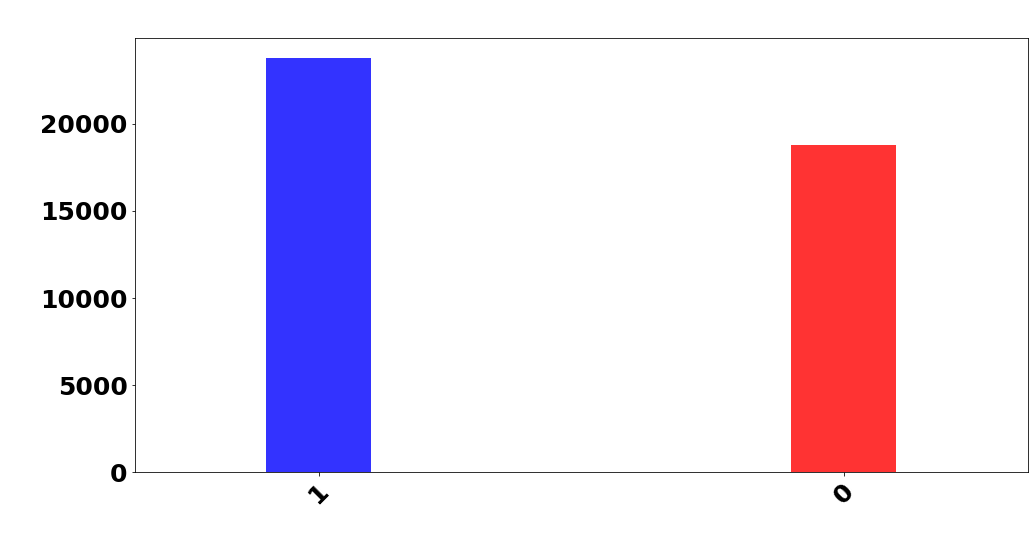

In [ ]:
#Configurando os parâmetros da Figura.
plt.figure(figsize=(16, 8))


#Plotando Gráfico com Matplotlib.
df_kmeans['Cluster'].value_counts().plot(kind='bar', color=['blue', 'red'],  alpha=0.8, width=0.2)


#Plotando Gráfico com Searborn.

#Configurações para as fontes dos textos.
font = {'family': 'serif',
        'weight': 'bold',
        'size': 16,
        }
plt.title('Gráfico para distribuição de Classes - Clusters', fontdict=font, color='white', size=30)

#Configurando título, labels e ticks
plt.xlabel('Meses de Coleta', fontdict=font, color='white', size=30)
plt.ylabel('Tweets Coletados', fontdict=font, color='white', size=30)

#Configuração de exibição dos ticks.
plt.xticks(rotation=45, size=25, color='black', weight="bold")
plt.yticks(size=25, color='black', weight="bold")

#Exibindo a figura.
plt.savefig('grafico.png', format='png', quality=100)
plt.show()

In [ ]:
#Verificando os clusters únicos.
df_kmeans['Cluster'].unique()

array([1, 0], dtype=int32)

In [ ]:
def cast_vector(row):
    return np.array(list(map(lambda x: x.astype('double'), row)))

#Criando Vocabulário em formato de Dicionário para o sentimento das palavras.
words = pd.DataFrame(word_vectors.vocab.keys())
#Nomeando a coluna do DataFrame.
words.columns = ['words']
#Atribuindo as palavras a classe positiva ou negativa, de acordo com a clusterização.
words['vectors'] = words.words.apply(lambda x: word_vectors.wv[f'{x}'])
words['vectors_typed'] = words.vectors.apply(cast_vector)
words['cluster'] = words.vectors.apply(lambda x: model.predict([np.array(x)]))
words.cluster = words.cluster.apply(lambda x: x[0])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if __name__ == '__main__':


*Explicação para Função Lambda que atribui um sentimento em potencial para as palavras.*

**Para atribuir uma pontuação de sentimento para cada palavra foi realizada uma multiplicação pelo quão próximos eles estavam de seu cluster (para denotar o quão potencialmente positivos / negativos os termos são). Como a pontuação que o algoritmo K-means produz é a distância de ambos os clusters, para ponderá-los corretamente, foi feita a multiplicação pelo inverso da pontuação de proximidade (divisão da pontuação de sentimento pela pontuação de proximidade).**

In [ ]:
#Para o cluster 0 atribuiu-se o sentimento como positivo e para o outro cluster atribuiu-se o sentimento negativo.
words['cluster_value'] = [1 if i==0 else -1 for i in words.cluster]
words['closeness_score'] = words.apply(lambda x: 1/(model.transform([x.vectors]).min()), axis=1)
words['sentiment_coeff'] = words.closeness_score * words.cluster_value

In [ ]:
words.head(5)

,words,vectors,vectors_typed,cluster,cluster_value,closeness_score,sentiment_coeff
0,membros_comissao,"[-0.07502657, -0.038172882, -0.015734691, -0.0...","[-0.07502657175064087, -0.0381728820502758, -0...",1,-1,2.485683,-2.485683
1,tecnica_testaram,"[-0.09493887, -0.016662594, -0.016460102, -0.0...","[-0.09493886679410934, -0.0166625939309597, -0...",1,-1,2.084342,-2.084342
2,positivo,"[-0.072557285, 0.007232728, 0.07412038, -0.016...","[-0.07255728542804718, 0.007232727948576212, 0...",1,-1,0.970819,-0.970819
3,covid19,"[0.013535765, -0.038039457, -0.11016184, 0.027...","[0.013535764999687672, -0.03803945705294609, -...",1,-1,1.011780,-1.011780
4,coronavirus,"[-0.031647414, 0.012752493, -0.04637445, -0.01...","[-0.03164741396903992, 0.012752492912113667, -...",1,-1,0.908858,-0.908858


In [ ]:
negativas = words.loc[words.sentiment_coeff < 0, ['words', 'cluster', 'sentiment_coeff']]
negativas

,words,cluster,sentiment_coeff
0,membros_comissao,1,-2.485683
1,tecnica_testaram,1,-2.084342
2,positivo,1,-0.970819
3,covid19,1,-1.011780
4,coronavirus,1,-0.908858
...,...,...,...
42501,embrapa,1,-2.060436
42502,comprar_dolares,1,-2.725158
42504,@kephas_joe,1,-1.367100
42505,identific...,1,-2.512602


In [ ]:
positivas = words.loc[words.sentiment_coeff > 0, ['words', 'cluster', 'sentiment_coeff']]
positivas

,words,cluster,sentiment_coeff
6,negando,0,1.524885
7,cegueira,0,1.966372
8,resolvi,0,1.652729
9,mandar,0,1.691776
10,"""lockdown""",0,1.427070
...,...,...,...
42484,@danilessa2,0,2.976716
42485,q_vo...,0,3.786637
42487,"seguras,",0,1.819090
42495,medida_restritiva,0,3.692292


In [ ]:
words.shape

(42507, 7)

In [ ]:
words.describe()['sentiment_coeff']

count    42507.000000
mean         0.019614
std          2.206346
min         -3.966708
25%         -1.823276
50%         -1.202840
75%          2.084764
max          5.736565
Name: sentiment_coeff, dtype: float64

In [ ]:
#Importando Módulo da biblioteca Plotly,
import plotly.graph_objects as go

#Instanciando uma figura.
fig = go.Figure()

#Configurando e criando a exibição do gráfico.
fig.add_trace(go.Box(y=words['sentiment_coeff'], name='Score de Sentimento', marker_color = 'black'))

#Configurando o Layout a ser exibido.
fig.update_layout(width=700, height=700)

#Exibindo imagem.
fig.show()

In [ ]:
words[['words', 'sentiment_coeff']].to_csv('dicionario_sentimentos.csv', index=False)

# Aplicando Métricas

https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

In [ ]:
from sklearn import metrics
from sklearn.metrics import silhouette_score 
from sklearn.metrics import davies_bouldin_score

In [ ]:
silhouette_score(word_vectors.vectors, model.labels_)

0.18802132

In [ ]:
metrics.calinski_harabasz_score(word_vectors.vectors, labels)

10975.194020451261

In [ ]:
davies_bouldin_score(word_vectors.vectors, labels)

1.8309633987573517

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.



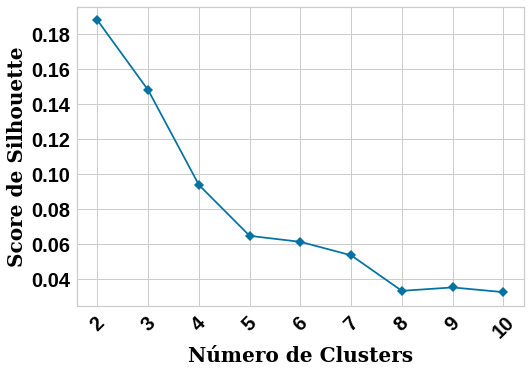

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,11), metric='silhouette', timings=False)
visualizer.fit(word_vectors.vectors);

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'bold',
        'size': 16,
        }

#Configuração de exibição do título, e labels dos eixos x e y.        
plt.xlabel('Número de Clusters', size=20, color='black', fontdict=font)
plt.ylabel('Score de Silhouette', size=20, color='black', fontdict=font)

#Configuração de exibição dos ticks.
plt.xticks(rotation=45, size=20, color='black', weight='bold')
plt.yticks(size=20, color='black', weight='bold')

#Salvando e Exibindo o Gráfico.
plt.savefig('elbow_silhouette.png', format='png', quality=100)
plt.show()


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in ver

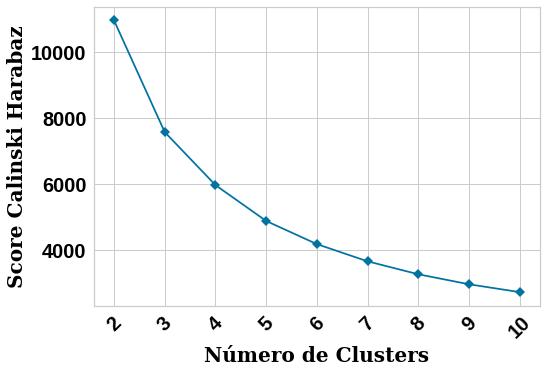

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,11), metric='calinski_harabaz', timings=False)
visualizer.fit(word_vectors.vectors);      

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'bold',
        'size': 16,
        }

#Configuração de exibição do título, e labels dos eixos x e y.        
plt.xlabel('Número de Clusters', size=20, color='black', fontdict=font)
plt.ylabel('Score Calinski Harabaz', size=20, color='black', fontdict=font)

#Configuração de exibição dos ticks.
plt.xticks(rotation=45, size=20, color='black', weight='bold')
plt.yticks(size=20, color='black', weight='bold')


plt.savefig('elbow_calinski.png', format='png', quality=100)
plt.show()

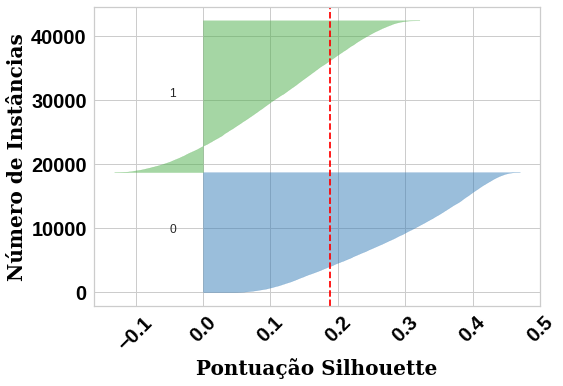

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(2, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(word_vectors.vectors);

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'bold',
        'size': 16,
        }

#Configuração de exibição do título, e labels dos eixos x e y.        
plt.ylabel('Número de Instâncias', size=20, color='black', fontdict=font)
plt.xlabel('Pontuação Silhouette', size=20, color='black', fontdict=font)

#Configuração de exibição dos ticks.
plt.xticks(rotation=45, size=20, color='black', weight='bold')
plt.yticks(size=20, color='black', weight='bold')

plt.savefig('silhouette.png', format='png', quality=100)
plt.show()

# Aplicando TF-IDF

In [ ]:
final_file = pd.read_csv('cleaned_dataset.csv')
final_file

,text
0,a b c d o i s m e m ...
1,c o r o n a v i r u s ...
2,@ m e e l r o c h a a ...
3,@ c h i c o _ v i g i l ...
4,t e m p o s c o r o n ...
...,...
103354,c o s t a r i c a | ...
103355,d o r a m a a c a b a ...
103356,# c o r o n a v i r u s ...
103357,c o r o n a v i r u s ...


In [ ]:
sentiment_map = pd.read_csv('dicionario_sentimentos.csv')
sentiment_map

,words,sentiment_coeff
0,membros_comissao,-2.485683
1,tecnica_testaram,-2.084342
2,positivo,-0.970819
3,covid19,-1.011780
4,coronavirus,-0.908858
...,...,...
42502,comprar_dolares,-2.725158
42503,idosos_moram,3.087350
42504,@kephas_joe,-1.367100
42505,identific...,-2.512602


In [ ]:
sentiment_dict = dict(zip(sentiment_map.words.values, sentiment_map.sentiment_coeff.values))

In [ ]:
file_weighting = final_file.copy()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(tokenizer=lambda y: y.split(), norm=None)
tfidf.fit(file_weighting.text)
features = pd.Series(tfidf.get_feature_names())
transformed = tfidf.transform(file_weighting.text)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



In [ ]:
def create_tfidf_dictionary(x, transformed_file, features):
    vector_coo = transformed_file['text'].tocoo()
    vector_coo.col = features.iloc[vector_coo.col].values
    dict_from_coo = dict(zip(vector_coo.col, vector_coo.data))
    return dict_from_coo

In [ ]:
def replace_tfidf_words(x, transformed_file, features):
    dictionary = create_tfidf_dictionary(x, transformed_file, features)   
    return list(map(lambda y:dictionary[f'{y}'], x.text.split()))

In [ ]:
replaced_tfidf_scores = file_weighting.apply(lambda x: replace_tfidf_words(x, transformed, features), axis=0)

IndexError: ignored